<a href="https://colab.research.google.com/github/WeiChenTseng/Titanic-analysis/blob/main/%E5%B0%88%E9%A1%8C%E5%AF%A6%E4%BD%9C_01_%E9%90%B5%E9%81%94%E5%B0%BC%E8%99%9F%E5%AD%98%E6%B4%BB%E9%A0%90%E6%B8%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 專題實作01 :鐵達尼號存活預測

#環境準備

In [1]:
import pandas as pd
import numpy as np

# 載入資料

In [2]:
#讀取資料
url = 'https://raw.githubusercontent.com/WeiChenTseng/Titanic-analysis/main/Titanic%20Data/train.csv'
ur2 = 'https://raw.githubusercontent.com/WeiChenTseng/Titanic-analysis/main/Titanic%20Data/test.csv'
df_train = pd.read_csv(url)
df_test = pd.read_csv(ur2)

In [3]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
print(df_train.columns)
print(df_test.columns)

print('訓練集與測試集的差異\n', set(df_train.columns) - set(df_test.columns))

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
訓練集與測試集的差異
 {'Survived'}


In [6]:
# 敘述性統計
df_train.describe() #屬量資料
df_train.describe(include=[object]) #屬質資料
df_train.describe(include='all') #全部

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# 統計觀察

In [8]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
# 將column 全部印出來
for column in df_train.columns:
  print(column)

PassengerId
Survived
Pclass
Name
Sex
Age
SibSp
Parch
Ticket
Fare
Cabin
Embarked


# Excersise: 請找出其他欄位的定義。

> Link: https://www.kaggle.com/competitions/titanic/data

* Survived: Survived (1) or died (0)
* Pclass: Passenger’s class
* Name: Passenger’s name
* Sex: Passenger’s sex
* Age: Passenger’s age
* SibSp: Passenger's of siblings/spouses aboard the Titanic
* Parch: Passenger's of parents/children aboard the titanic
* Ticket: Passenger's ticket number
* Fare: Passenger fare
* Cabin: Cabin number
* Embarked: Port of Embarkation



### Excersise: 進一步觀察其他「數值欄位: PassengerId, Survived, Pclass, Age, Sibsp, Parch, Fare」的屬性與「Survived」之關係程度，找出關係大的欄位。： Parch與SibSp 在相關係數上為最大，且呈現正向關係


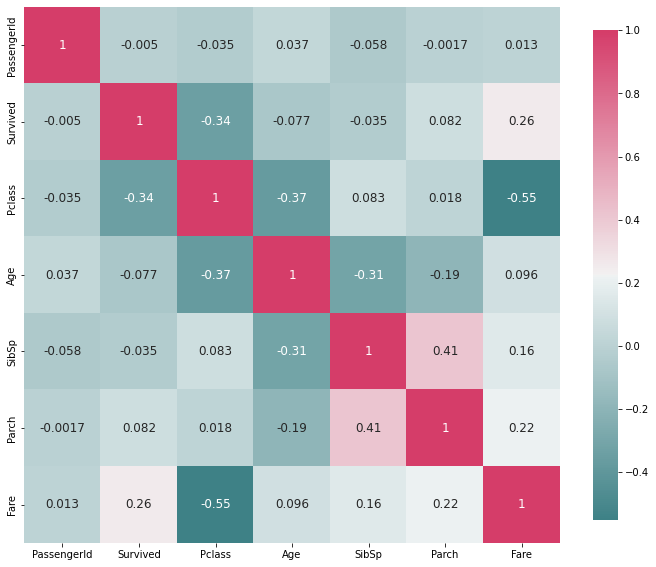

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

corr = df_train.corr() #計算相關係數
cmap = sns.diverging_palette( 200 , 0 , as_cmap = True ) #調色盤
sns.heatmap(
        corr, 
        cmap = cmap,
        square= True, 
        cbar_kws= { 'shrink' : .9 }, 
        ax = plt.subplots( figsize =( 12 , 10 ) )[1],
        annot = True, 
        annot_kws = { 'fontsize' : 12 }
)

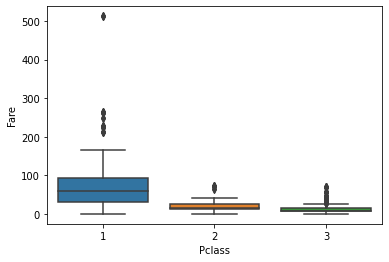

In [11]:
# 箱型圖，查看資料分散程度
sns.boxplot(x='Pclass',y='Fare',data=df_train) #可以看出在第一艙位的船票費用較為分散

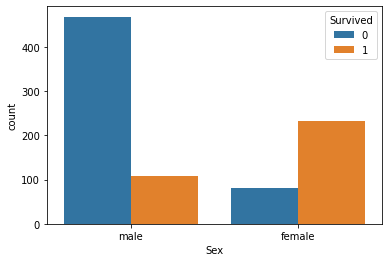

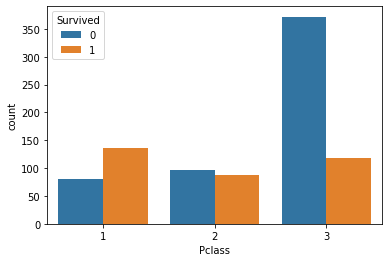

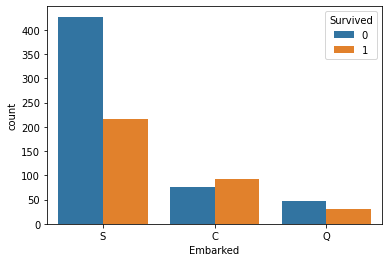

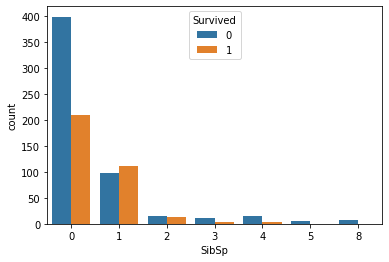

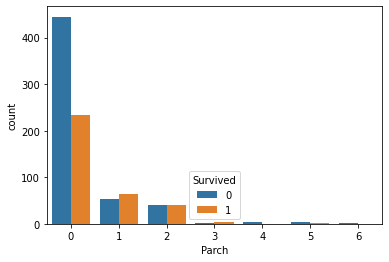

In [12]:
# 長條對比圖-按照存活分類
selected_cols = ['Sex','Pclass','Embarked','SibSp','Parch']

for i in selected_cols:
  sns.countplot(x=i, hue='Survived', data=df_train)
  plt.show()

# 資料型態轉換

In [13]:
df_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [14]:
# 資料型態的轉換 將 male->0
df_train['Sex']
df_train['Sex'].value_counts()

sex_encoding = {
    'male': 0,
    'female': 1
}

df_train['Sex'] = df_train['Sex'].map(lambda x: sex_encoding[x])


In [15]:
df_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",0,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",1,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",0,26.0,0,0,111369,30.0000,C148,C


Excersise: 所有類別欄位都可以利用數值直接轉換嗎？或是要依循什麼規則進行轉換？

Ans:
當資料為有序的可以直接用數值來轉換: (LabelEncoder)
當資料為無序的不可以直接用數值來轉換:
(OneHotEncoder)

# 資料空值處理

In [16]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int64  
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(6), object(4)
memory usage: 83.7+ KB


In [17]:
df_train.isnull().any() #尋找存在缺漏值的columns

df_train_inputed = df_train.fillna(0) #將空值都轉換為0

df_train_inputed.replace('nan',0,inplace=True) #將nan都轉換為nan

df_train_inputed

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,0,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,0,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,0,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",0,27.0,0,0,211536,13.0000,0,S
887,888,1,1,"Graham, Miss. Margaret Edith",1,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,0.0,1,2,W./C. 6607,23.4500,0,S
889,890,1,1,"Behr, Mr. Karl Howell",0,26.0,0,0,111369,30.0000,C148,C


Excersise: 請試著把資料中期他有空值的欄位也進行調整。

# 請進行「必要」的資料前處理操作，讓資料變成可以跑得動模型的格式即可。

In [18]:
columns_X = set(df_train.columns) - {'Survived'} #去掉column為{'Survived'}的資料
columns_X = set(df_train.columns[df_train.dtypes.isin([np.dtype('int'), np.dtype('float')])]) - {'Survived'}
# df_train.dtypes.isin([np.dtype('int'), np.dtype('float')])選擇int, float的資料
# 挑選出已經被清理過的資料且為非字串
columns_y = ['Survived']

train_X = df_train[columns_X]
train_y = df_train[columns_y]

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

log = LogisticRegression(random_state=0, max_iter=3000)
scores = cross_val_score(log, train_X, train_y.values.ravel(),cv=5,scoring='accuracy')
scores

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
5 fits failed out of a total of 5.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 1514, in fit
    accept_large_sparse=solver not in ["liblinear", "sag", "saga"],
  File "/usr/local/lib/python3.7/dist-packages/sklearn/base.py", line 581, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "/usr/loc

array([nan, nan, nan, nan, nan])

# Day03 專題實作 #01：鐵達尼號存活預測 - 運用資料與特徵優化分析

1. 延續昨天的觀察，欄位中與「是否生存欄位」找出關係比較大的欄位有哪些？你是如何定義「關係大」的呢？

（Hint: 可以利用視覺化圖表、 correlation、feature importance 等方法）


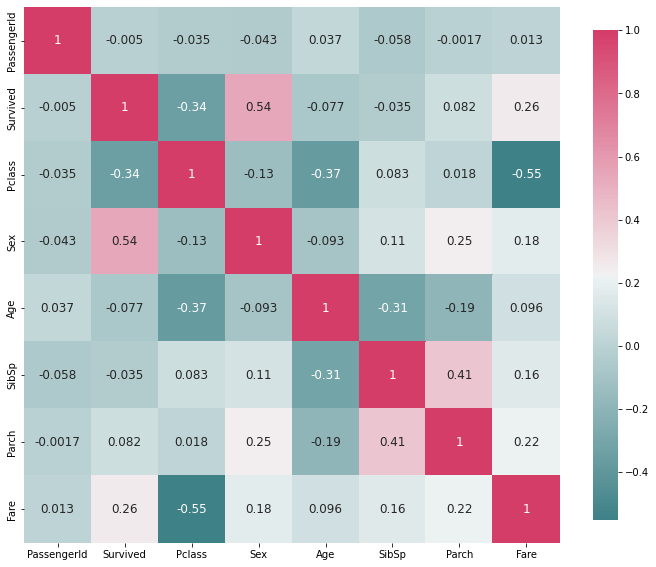

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

corr = df_train.corr() #計算相關係數
cmap = sns.diverging_palette( 200 , 0 , as_cmap = True ) #調色盤
sns.heatmap(
        corr, 
        cmap = cmap,
        square= True, 
        cbar_kws= { 'shrink' : .9 }, 
        ax = plt.subplots( figsize =( 12 , 10 ) )[1],
        annot = True, 
        annot_kws = { 'fontsize' : 12 }
)


可以看到Survive與Sex、Pclass有明顯的相關性。

1.   Sex,Survive呈現正相關
2.   Pclass,Survive呈現負相關

 關係大小從相關係數取絕對值來作為依據，越接近1則關係大

2. 請問資料中有哪些「欄位」你覺得是多餘的，在分析過程中應該被排除的呢？為什麼？

由相關係數表可以看到PassengeID、Age與Survived的相關性很低，可以在分析的時候去除掉這兩個object

#特徵工程
https://aifreeblog.herokuapp.com/posts/64/Data_Analytics_in_Practice_Titanic/

In [20]:
# 檢查缺漏值
train_data = df_train
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int64  
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(6), object(4)
memory usage: 83.7+ KB


3. 請你針對「有缺失值」的幾個欄位，嘗試比較不同的處理策略（例如用常數、中位數、平均數填補）。

In [21]:
# 將年齡的缺漏值用平均年齡來填補 
train_data['Age'].fillna(train_data.Age.median(), inplace=True)

In [22]:
print(train_data['Embarked'].value_counts())
# 因為最多人的登船處為S，所以缺漏值以S來填補
train_data['Embarked'].fillna('S',inplace=True) 

S    644
C    168
Q     77
Name: Embarked, dtype: int64




4. 請你針對「非數值型」的幾個欄位，嘗試比較不同的處理策略（例如用 LabelEncoder 或 OneHotEncoder）。


船客名稱

In [23]:
# 處理字串欄位
train_data['Title'] = train_data['Name'].str.split(', ',expand=True)[1]
train_data['Title'] = train_data['Title'].str.split('.',expand=True)[0]
train_data['Title'].value_counts()

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Mlle              2
Major             2
Col               2
the Countess      1
Capt              1
Ms                1
Sir               1
Lady              1
Mme               1
Don               1
Jonkheer          1
Name: Title, dtype: int64

In [24]:
# 將罕見的名稱給統稱為Rare
train_data['Title'] = train_data['Title'].replace( ['Don','Rev','Dr','Major','Lady','Sir','Col','Capt','Countess','Jonkheer','Dona'], 'Rare')
train_data['Title'] = train_data['Title'].replace( ['Ms','Mlle'], 'Miss' )
train_data['Title'] = train_data['Title'].replace( 'Mme', 'Mrs' )
train_data['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Rare', 'the Countess'],
      dtype=object)

In [25]:
# 刪除原始資料中的欄位
train_data.drop('Name', axis=1, inplace=True)

船票號碼

In [26]:
train_data['Ticket']

0             A/5 21171
1              PC 17599
2      STON/O2. 3101282
3                113803
4                373450
             ...       
886              211536
887              112053
888          W./C. 6607
889              111369
890              370376
Name: Ticket, Length: 891, dtype: object

In [27]:
train_data['Ticket_info'] = train_data.Ticket.apply( lambda x:x.replace('.','').replace('/','').split(' ')[0] if not x.isdigit() else 'X')
train_data['Ticket_info'].unique()
# replace('.','') 將.取代成空白
# replace('/','') 將/取代成空白
# split('') 以空格為分割符號

array(['A5', 'PC', 'STONO2', 'X', 'PP', 'CA', 'SCParis', 'SCA4', 'A4',
       'SP', 'SOC', 'WC', 'SOTONOQ', 'WEP', 'STONO', 'C', 'SCPARIS',
       'SOP', 'Fa', 'LINE', 'FCC', 'SWPP', 'SCOW', 'PPP', 'SC', 'SCAH',
       'AS', 'SOPP', 'FC', 'SOTONO2', 'CASOTON'], dtype=object)

In [28]:
# 刪除原始資料中的 Ticket 欄位
train_data.drop( 'Ticket', axis=1, inplace=True)

船艙號碼

In [29]:
train_data['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [30]:
train_data['Cabin'] = train_data['Cabin'].apply(lambda x:str(x)[0] if not pd.isnull(x) else 'NoCabin')
train_data['Cabin'].unique()

array(['NoCabin', 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

In [32]:
train_data

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Title,Ticket_info
0,1,0,3,0,22.0,1,0,7.2500,NoCabin,S,Mr,A5
1,2,1,1,1,38.0,1,0,71.2833,C,C,Mrs,PC
2,3,1,3,1,26.0,0,0,7.9250,NoCabin,S,Miss,STONO2
3,4,1,1,1,35.0,1,0,53.1000,C,S,Mrs,X
4,5,0,3,0,35.0,0,0,8.0500,NoCabin,S,Mr,X
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,0,27.0,0,0,13.0000,NoCabin,S,Rare,X
887,888,1,1,1,19.0,0,0,30.0000,B,S,Miss,X
888,889,0,3,1,28.0,1,2,23.4500,NoCabin,S,Miss,WC
889,890,1,1,0,26.0,0,0,30.0000,C,C,Mr,X


將Embarked 透過 One Hot Encoding轉換
(虛擬變數)

In [33]:
OneHot_Embarked = pd.get_dummies( train_data.Embarked, prefix='Embarked')

In [34]:
train_data = pd.concat( [ train_data, OneHot_Embarked ], axis=1 ) #Concat 將資料去做合併
train_data.drop( 'Embarked', axis=1, inplace=True)

將類別型態轉為整數

In [42]:
train_data['Title'] = train_data['Title'].astype('category').cat.codes
train_data['Ticket_info'] = train_data['Ticket_info'].astype('category').cat.codes
train_data['Cabin'] = train_data['Cabin'].astype('category').cat.codes

In [43]:
train_data

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Title,Ticket_info,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,0,22.0,1,0,7.2500,7,2,1,0,0,1
1,2,1,1,1,38.0,1,0,71.2833,2,3,10,1,0,0
2,3,1,3,1,26.0,0,0,7.9250,7,1,26,0,0,1
3,4,1,1,1,35.0,1,0,53.1000,2,3,30,0,0,1
4,5,0,3,0,35.0,0,0,8.0500,7,2,30,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,0,27.0,0,0,13.0000,7,4,30,0,0,1
887,888,1,1,1,19.0,0,0,30.0000,1,1,30,0,0,1
888,889,0,3,1,28.0,1,2,23.4500,7,1,28,0,0,1
889,890,1,1,0,26.0,0,0,30.0000,2,2,30,1,0,0


5. 請你嘗試不同的特徵工程手法，產生可以幫助分析結果的新變數。

In [44]:
df_train = train_data

In [45]:
columns_X = set(df_train.columns) - {'Survived'}
columns_y = ['Survived']

train_X = df_train[columns_X]
train_y = df_train[columns_y]

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

log = LogisticRegression(random_state=0, max_iter=3000)
scores = cross_val_score(log, train_X, train_y.values.ravel(),cv=5,scoring='accuracy')
scores

array([0.79329609, 0.7752809 , 0.78651685, 0.76966292, 0.78651685])